<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/CNN_Detect_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
folder = '/content/drive/MyDrive/Homework_CNN_Picture/Face_Picture/'
photos, labels = list(), list()

In [3]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('Nha'):
    output = 1.0
  if file.startswith('Cuong'):
    output = 2.0
  if file.startswith('Phuc'):
    output = 3.0
  if file.startswith('Tan'):
    output = 4.0
  photo = load_img(folder+file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [4]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(233, 30, 40, 3) (233,)


In [5]:
# Save data after preprocessing data
save('/content/drive/MyDrive/Picture_Preprocessing/Face_Preprocessing/Face_photos.npy', photos)
save('/content/drive/MyDrive/Picture_Preprocessing/Face_Preprocessing/Face_labels.npy', labels)

In [6]:
# Read data
photos = np.load('/content/drive/MyDrive/Picture_Preprocessing/Face_Preprocessing/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Picture_Preprocessing/Face_Preprocessing/Face_labels.npy')

In [16]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=5)
print(x_train.shape, y_train.shape)

(233, 30, 40, 3) (233, 5)


In [17]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [18]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(30, 40, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5, activation='softmax'))

In [37]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 50, epochs = 2, verbose = 1)

Epoch 1/2
5/5 [==============================] - 2s 155ms/step - loss: 0.3270 - accuracy: 0.9142
Epoch 2/2
5/5 [==============================] - 1s 132ms/step - loss: 0.1270 - accuracy: 0.9657


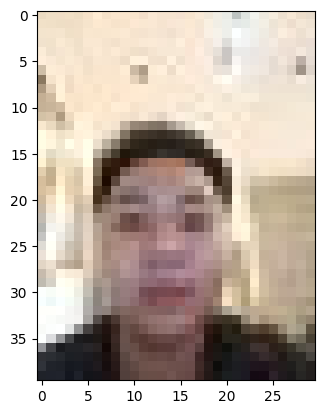

1/1 [==============================] - 0s 25ms/step
Bạn:  Cường


In [44]:
# Mở ảnh
img = Image.open('Cuong56.jpg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((30, 40))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết","Nhã","Cường","Phúc","Tấn"]

temp1 = matrix[0]
print("Bạn: ", class_names[temp1])